In [2]:
import os
print(os.getcwd())

C:\Users\장세환


In [19]:
os.chdir("C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406")
print(os.getcwd)

<built-in function getcwd>


In [20]:
print(os.getcwd())

C:\Users\장세환\Desktop\시계열\코로나_해외유입환자모델링\corona_contest_data_0406


In [138]:
import tensorflow as tf
import matplotlib as mpl
from fbprophet import Prophet
# General Library

import numpy as np
import pandas as pd
import time
import datetime
import random
import os
import csv
import matplotlib.pyplot as plt

# Machine Learning Library
from fbprophet import Prophet
import lightgbm as lgb
#import sklearn
#from sklearn.model_selection import train_test_split

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-138-77d1840adc60>", line 1, in <module>
    import tensorflow as tf
  File "C:\Anaconda\lib\site-packages\tensorflow\__init__.py", line 101, in <module>
    from tensorflow_core import *
  File "C:\Anaconda\lib\site-packages\tensorflow_core\__init__.py", line 40, in <module>
    from tensorflow.python.tools import module_util as _module_util
ModuleNotFoundError: No module named 'tensorflow.python.tools'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception 

ModuleNotFoundError: No module named 'tensorflow.python.tools'

### 로밍 데이터
return: 로밍 여행자가 한국에 귀국한 날짜(ex)20200128 )
iso: 2자리 국가코드(ex)cn )
arrival: iso국가에 도착한 날짜(ex)20200123 )
departure: iso 국가에 떠난 날짜(ex) 20200128)
count: 고객 수(return 일자에 귀국한 로밍 고객 중 iso국가에 arrival에 도착해서 departure에 떠난 고객 수) (ex) 161)
### 감염병 데이터
- 파일명 : 파일리스트의 파일명과 일치
- 제목 : 기사 제목
- URL : 원문 링크
- 수집 일자 : KT 크롤링 시스템에 의해 기사가 수집된 날짜
- 게시 일자 : 원문 Site에 해당 기사가 게시된 날짜
- 채널명 : 기사가 게시된 Site의 이름
- 감염병명 : 기사에 표기된 감염병의 이름
- 분류명 : 감염병의 분류(카테고리) 명

In [21]:
roaming_df=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data.csv')
news_df=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/NewsList.csv')
patient_df=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset.xlsx')

In [29]:
roaming_df.head()

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


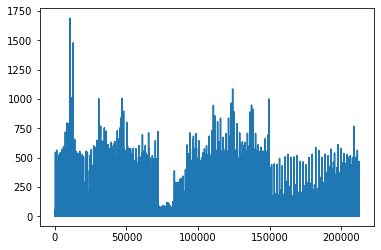

In [16]:
plt.plot(roaming_df['count'])

In [30]:
roaming_df[['iso', 'count']].groupby(['iso'], as_index=False).sum().sort_values(by='count', ascending = False)

,iso,count
166,vn,228695
75,jp,227822
32,cn,207934
150,th,103383
124,ph,100486
...,...,...
155,to,3
27,cf,3
98,ml,3
168,ws,3


In [ ]:
# 가설1: 우리나라보다 감염자가 많은 국가에서 유입될것이다
# 일별 해외유입환자수 데이터 필요
# 

In [31]:
roaming_df['return'] = roaming_df['return'].apply(lambda x:pd.to_datetime(str(x), format='%Y%m%d'))
roaming_df['return_year'] = roaming_df['return'].apply(lambda x : x.year)
roaming_df['return_month'] = roaming_df['return'].apply(lambda x : x.month)
roaming_df['return_day'] = roaming_df['return'].apply(lambda x : x.day)

# 환자수 사용

In [154]:
patient_df.head()

,ds,y,ch,asia,europe,us,africa,austrailia
0,2020-01-20,1,1,0,0,0,0,0
1,2020-01-24,1,1,0,0,0,0,0
2,2020-01-26,1,1,0,0,0,0,0
3,2020-01-27,1,1,0,0,0,0,0
4,2020-01-30,1,1,0,0,0,0,0


In [155]:
y=patient_df['y']# prophet에 넣기 위해 변경
ds=patient_df['ds']
df=pd.concat([ds,y],axis=1)
df.head()#다변량으로 넣어도 유의미할지 잘모르겠음

,ds,y
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,1


In [156]:
df['ds']=pd.to_datetime(df['ds'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6736B7748>],
      dtype=object)

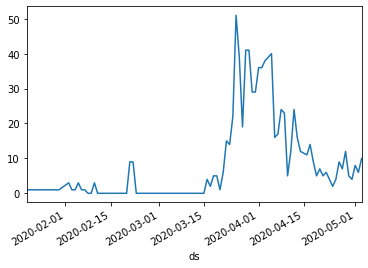

In [144]:
uni_data.plot(subplots=True)

In [157]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [158]:
future = m.make_future_dataframe(periods=14)
future.tail()

,ds
104,2020-05-13
105,2020-05-14
106,2020-05-15
107,2020-05-16
108,2020-05-17


In [159]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
104,2020-05-13,21.586999,6.876066,36.543782
105,2020-05-14,19.826157,5.372647,33.960889
106,2020-05-15,18.061108,3.681746,30.572609
107,2020-05-16,17.788243,3.917928,30.967529
108,2020-05-17,21.480915,7.785035,35.268448


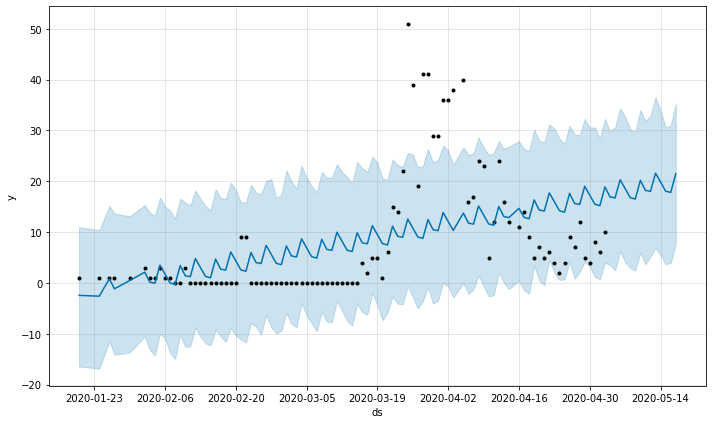

In [160]:
fig1 = m.plot(forecast)

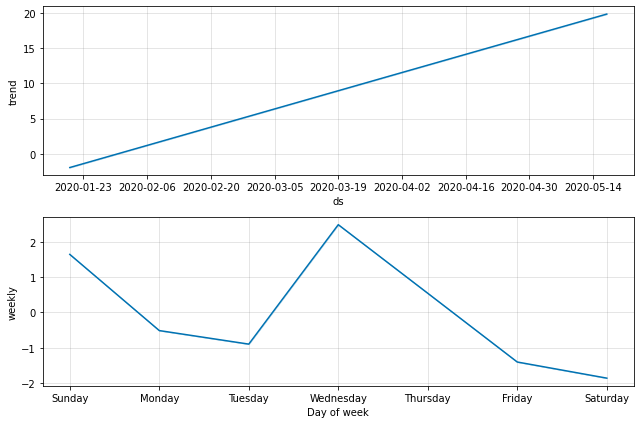

In [133]:
fig2 = m.plot_components(forecast)

In [63]:
df['y'].astype(float)
uni_data = df['y']
uni_data.index = df['ds']
uni_data.head()

ds
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    1
Name: y, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67139F348>],
      dtype=object)

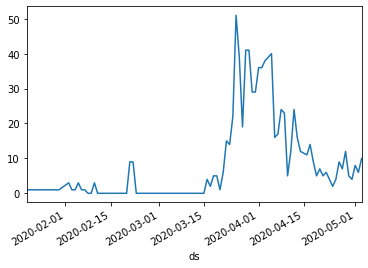

In [64]:
uni_data.plot(subplots=True)# 3/22 을 기점으로 확 뛰는 모습을 보인다.

3/22 을 기점으로 확 뛰는 모습을 보인다.
1. 3/22을 기준으로 데이터를 나눠서 피팅해서 확인해 보기
2. 기사크롤링, 로밍데이터에서 3/22에 어떤 사건이나 경향성이 바뀐것이 있는지 확인해보기->해주세용


In [92]:
# 1번
df1=df[55:]
df1.head()

,ds,y
55,2020-03-23,14
56,2020-03-24,22
57,2020-03-25,51
58,2020-03-26,39
59,2020-03-27,19


In [93]:
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
future = m.make_future_dataframe(periods=18)
future.tail()

,ds
53,2020-05-17
54,2020-05-18
55,2020-05-19
56,2020-05-20
57,2020-05-21


In [100]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
53,2020-05-17,-5.895254,-15.748435,3.947348
54,2020-05-18,-18.711474,-28.118031,-9.647736
55,2020-05-19,-17.368573,-26.486670,-7.937038
56,2020-05-20,-9.689820,-19.050431,-0.918272
57,2020-05-21,-14.011219,-22.625615,-4.759245


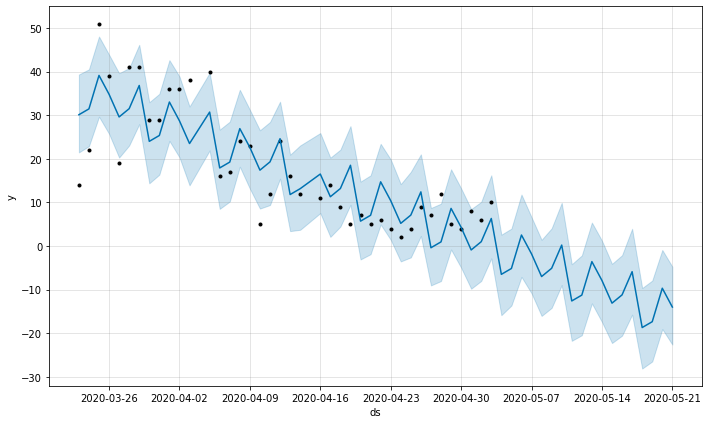

In [101]:
fig1 = m.plot(forecast)

In [109]:
# 최근 트렌드를 더 반영하기 위하여 앞부분만 다시 피팅
df2=df[80:]
df2.head()

,ds,y
80,2020-04-19,5
81,2020-04-20,7
82,2020-04-21,5
83,2020-04-22,6
84,2020-04-23,4


In [110]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [114]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
30,2020-05-19
31,2020-05-20
32,2020-05-21
33,2020-05-22
34,2020-05-23


In [115]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
30,2020-05-19,16.901772,15.145596,18.707673
31,2020-05-20,13.885511,12.031194,15.716105
32,2020-05-21,12.377389,10.539106,14.162768
33,2020-05-22,13.382836,11.574256,15.247653
34,2020-05-23,13.382849,11.562052,15.187532


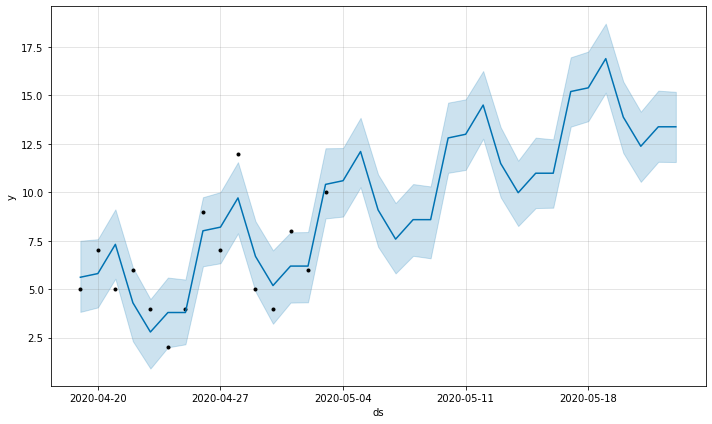

In [116]:
fig2 = m.plot(forecast)

최신 데이터 위주로 더 짧게 추정하니 조금 더 그럴 듯 해지기 시작했다.
그렇다면 관건은 미래(5월6~19일)의 트렌드를 가장 잘 담을 수 있는 구간이 언제부터인가 고민하는것이다.
또한 데이터가 적어 오버피팅의 우려가 있고 예상하지 못하는 사건(ex) 입국자 격리제한 해제 및 입국 자유 등)이 예상구간에 발생한다면 잡아내기 힘들 것으로 보인다.
<생각해볼 점>
1. 과거의 해외환자유입수가 현재의 해외환자유입수에 얼마나 영향을 미치는가?
2. 언제까지의 트렌드가 미래의 트렌드에 영향을 미치는가
3. 과거의 트렌드까지 반영해주는 것보다 현재와 가까운 트렌드 위주로 반영해주는것이 더 잘 예측할 수도 있겠다!->lstm보다 rnn이 나을수도 있다.
-> 반복해서 구간별로 잘라서 예측해보자
->2주단위를 잘 예측할 수 있는 데이터 구간을 찾자! (lgbmregressor, mlpregressor)

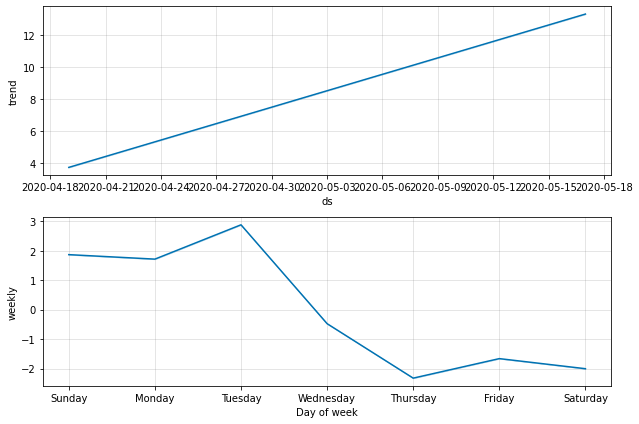

In [77]:
fig2 = m.plot_components(forecast)

# 최적의 x,y 를 찾자 ->grid search
df2=df[x:]
future = m.make_future_dataframe(periods=y)
forecast = m.predict(future)
fig = m.plot(forecast)

데이터를 구간을 나눠서 x,y 를 따로따로 학습시켜보자

In [134]:
len(df)

95

In [148]:
df_1=df[:15]
df_2=df[15:30]
df_3=df[30:45]
df_4=df[45:60]
df_5=df[60:75]
df_6=df[75:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C65A0CCA48>],
      dtype=object)

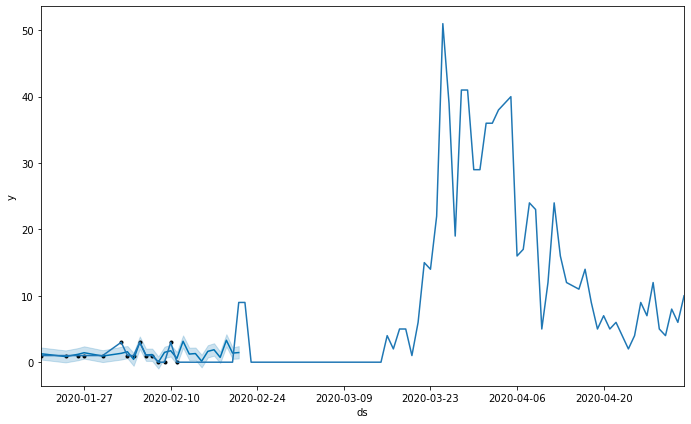

In [163]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=10)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C65A08CA48>],
      dtype=object)

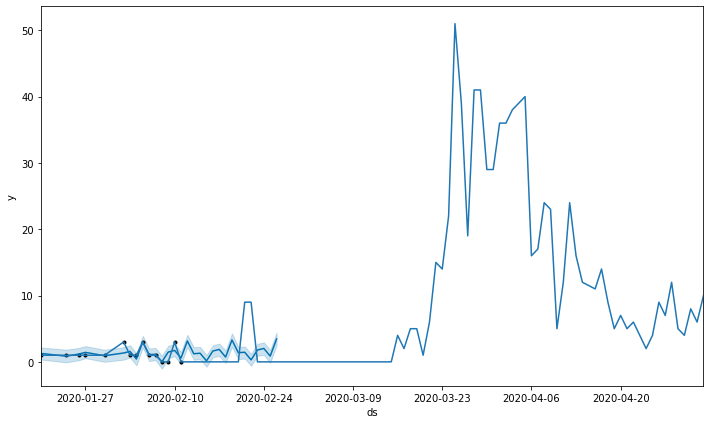

In [164]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=15)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C671B7AD48>],
      dtype=object)

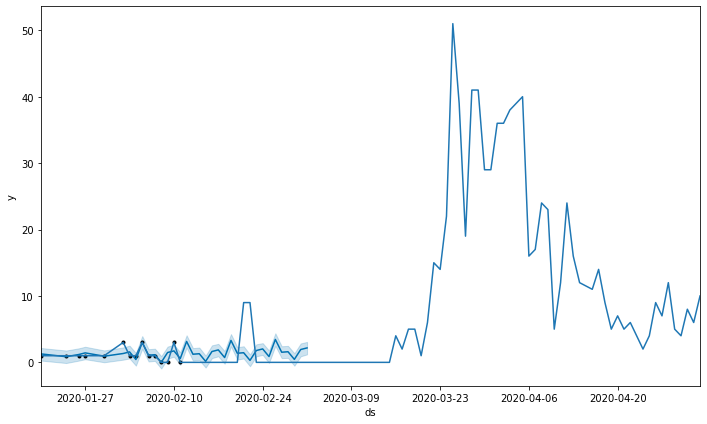

In [165]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C65A0C9A88>],
      dtype=object)

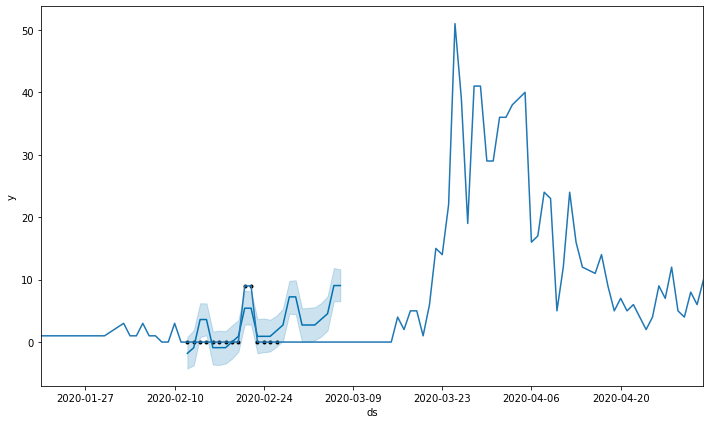

In [166]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=10)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C671D5D448>],
      dtype=object)

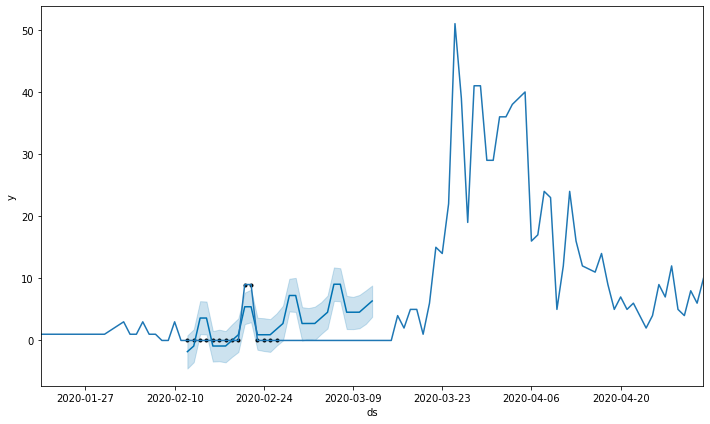

In [167]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=15)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C671BF59C8>],
      dtype=object)

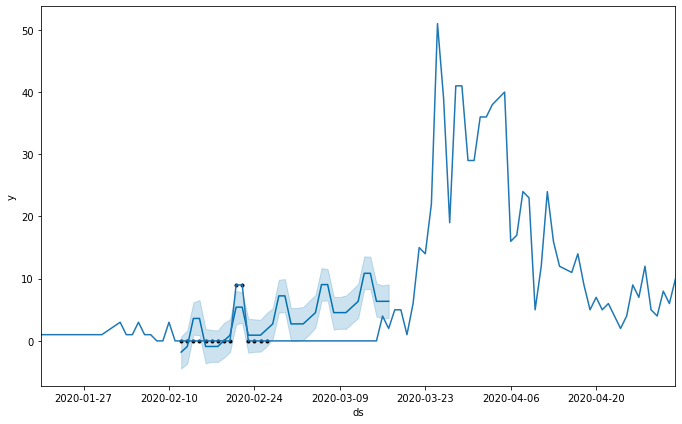

In [168]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C65A2E5908>],
      dtype=object)

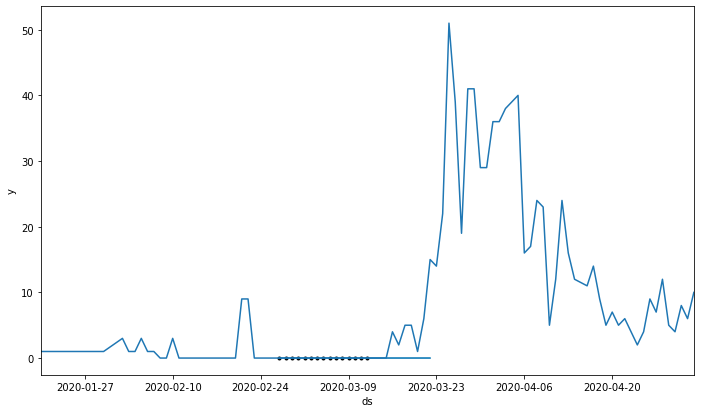

In [169]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=10)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6713D7288>],
      dtype=object)

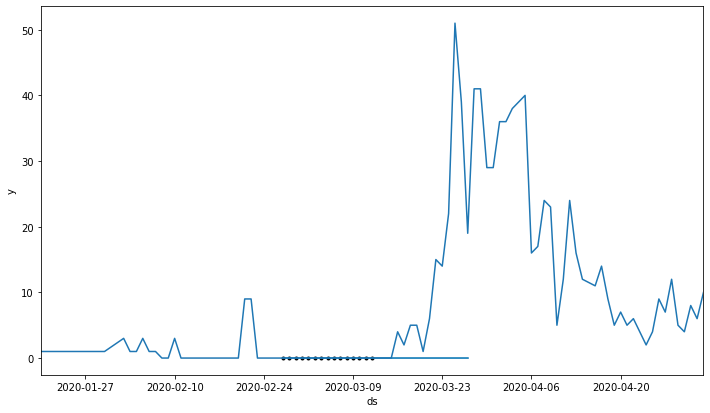

In [170]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=15)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C671B6B0C8>],
      dtype=object)

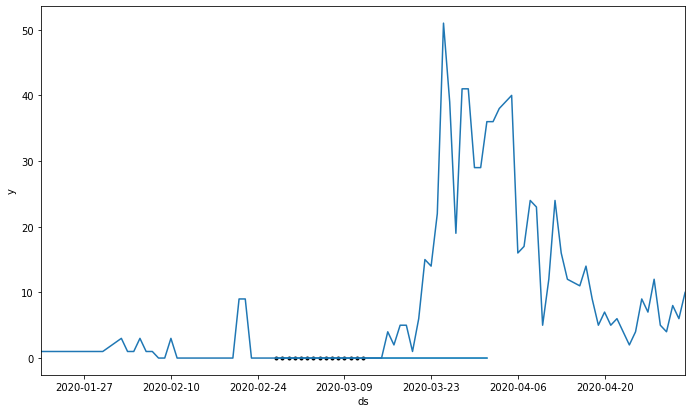

In [171]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6733F0248>],
      dtype=object)

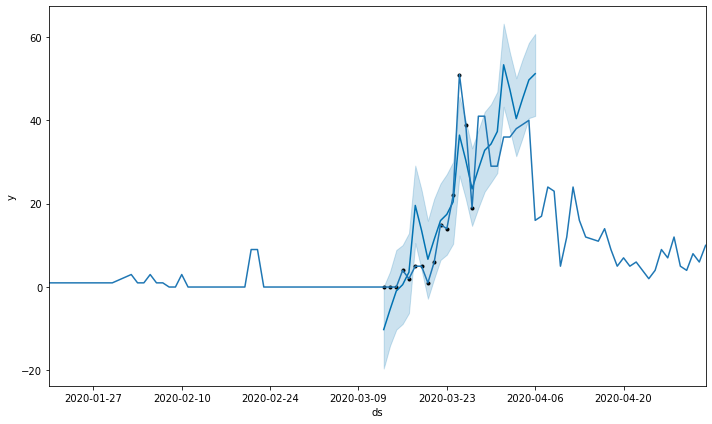

In [172]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=10)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C671B39788>],
      dtype=object)

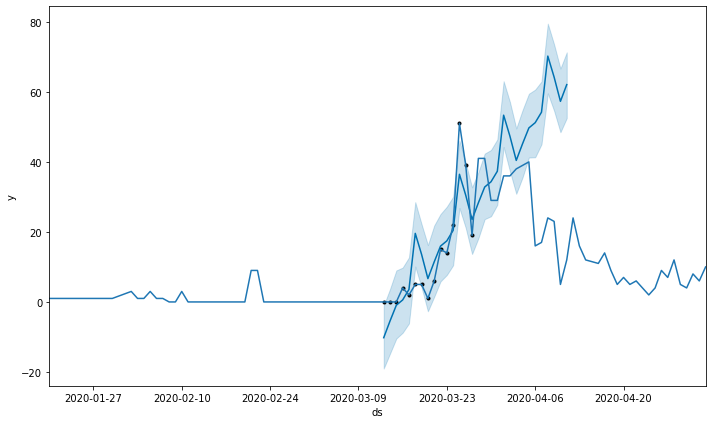

In [173]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=15)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C66A355B08>],
      dtype=object)

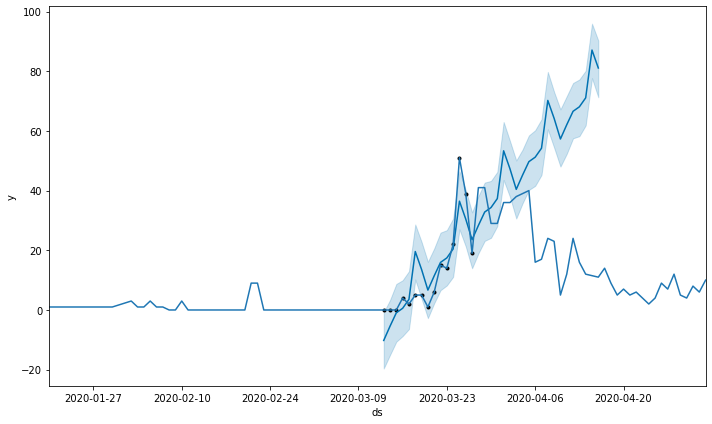

In [174]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C66A375B48>],
      dtype=object)

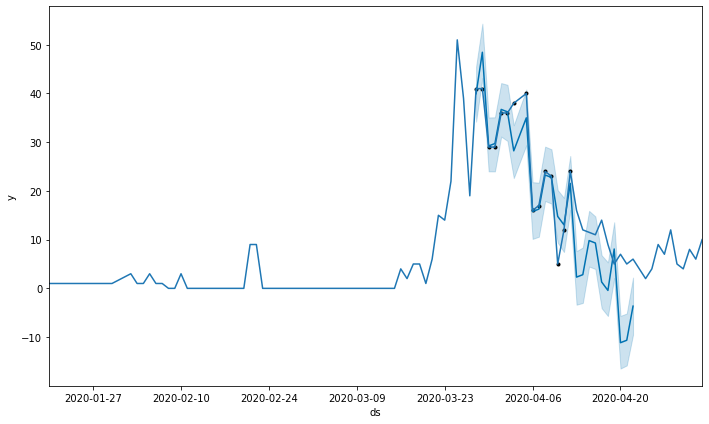

In [175]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=10)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C66A35B3C8>],
      dtype=object)

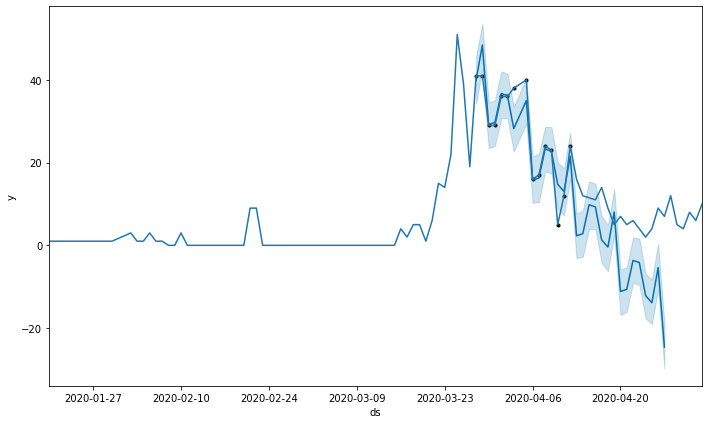

In [176]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=15)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C66A11F1C8>],
      dtype=object)

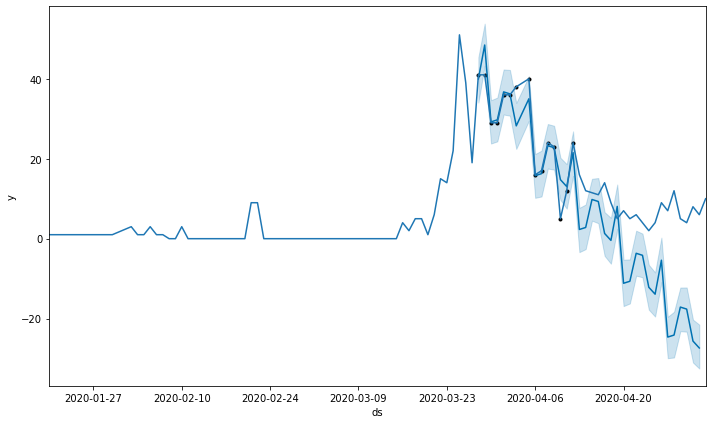

In [177]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=20)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C677760A08>],
      dtype=object)

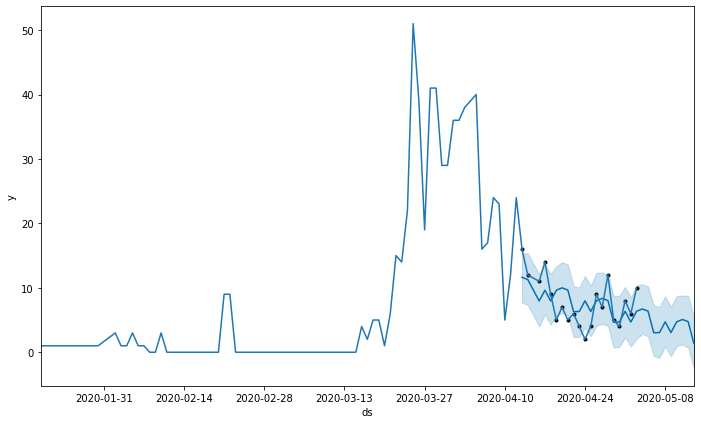

In [178]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=10)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6770888C8>],
      dtype=object)

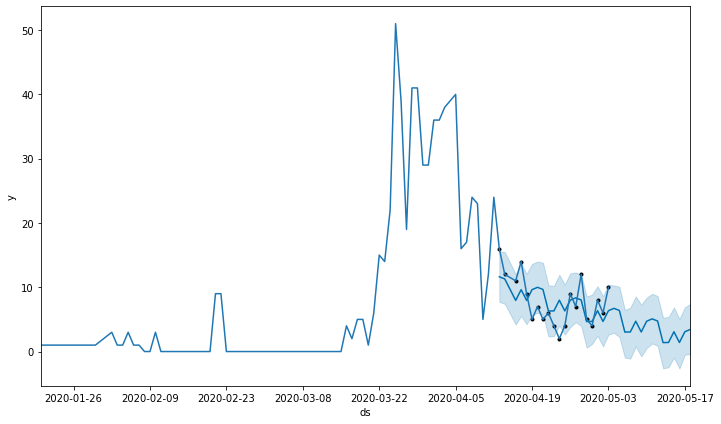

In [180]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=15)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C673414608>],
      dtype=object)

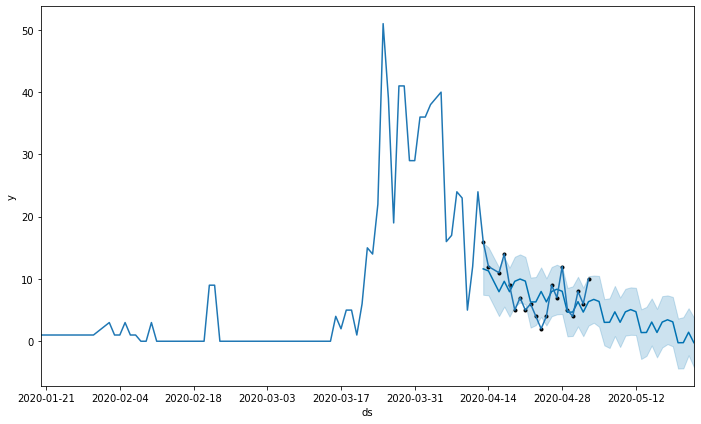

In [179]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=20)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

# period를 얼마로 지정하는것은 분석에 관계가 없다
->데이터 구간 잘 나누기

In [181]:
df_1=df[:10]
df_2=df[10:20]
df_3=df[20:30]
df_4=df[40:50]
df_5=df[60:70]
df_6=df[70:80]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6736B1088>],
      dtype=object)

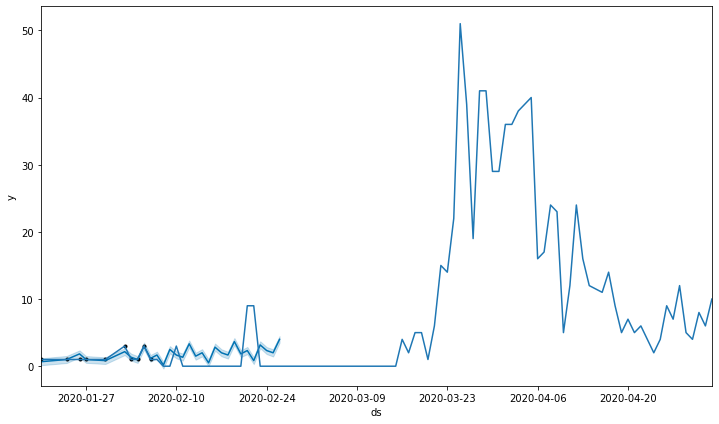

In [182]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C670C33088>],
      dtype=object)

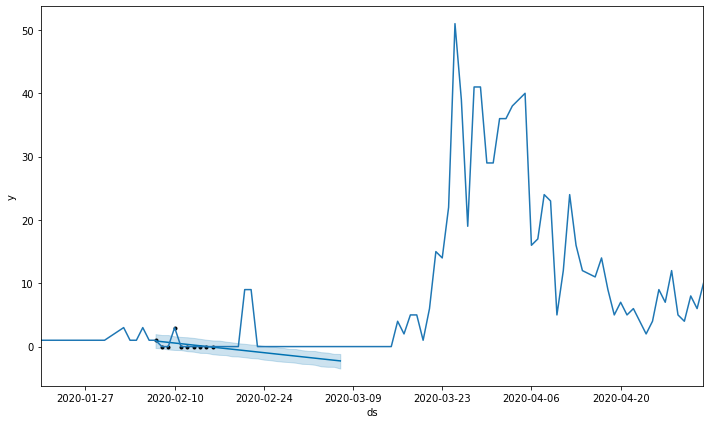

In [183]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C671759688>],
      dtype=object)

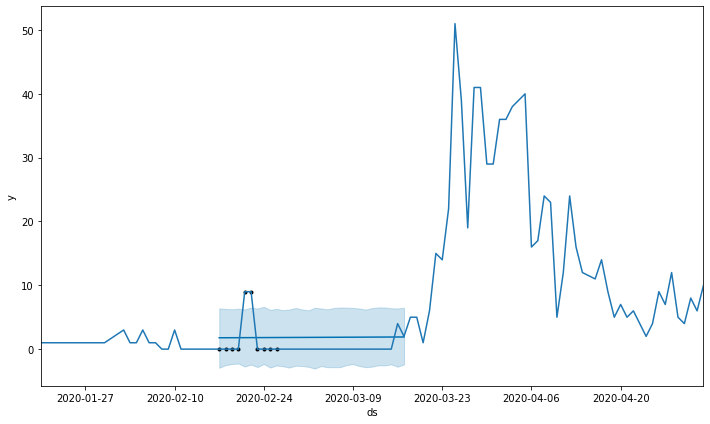

In [184]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C679F12348>],
      dtype=object)

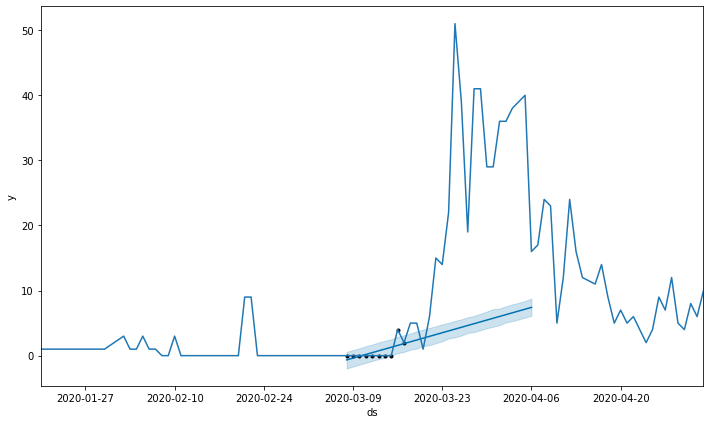

In [185]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C673A29F08>],
      dtype=object)

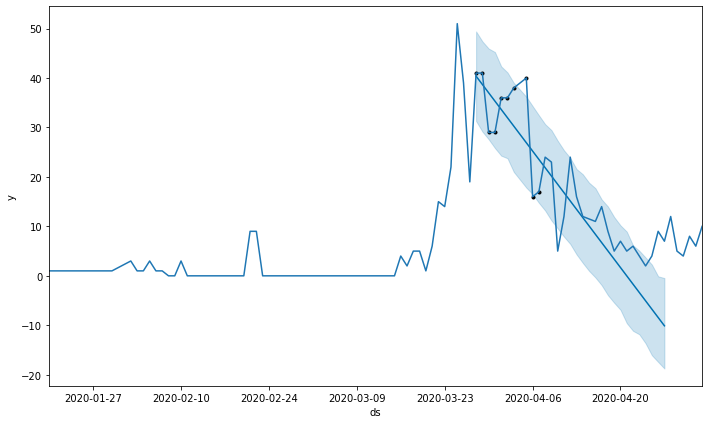

In [186]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=20)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C679097508>],
      dtype=object)

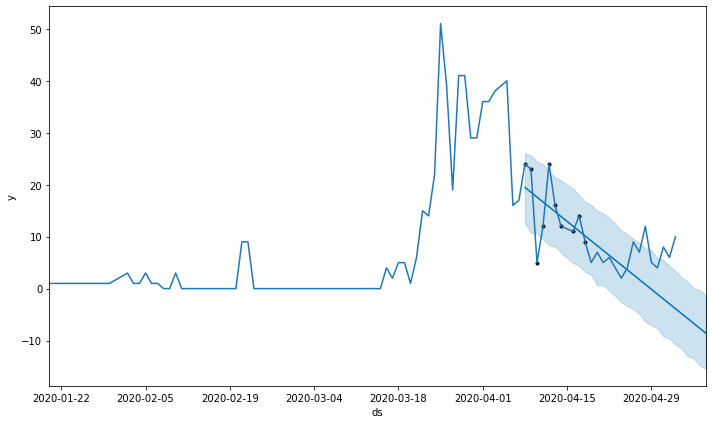

In [187]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=20)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

# 10개씩 자르니 확연히 언더피팅된 모습을 볼 수 있다.

In [188]:
df_1=df[:20]
df_2=df[20:40]
df_3=df[40:60]
df_4=df[60:80]
df_5=df[80:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C65A079F08>],
      dtype=object)

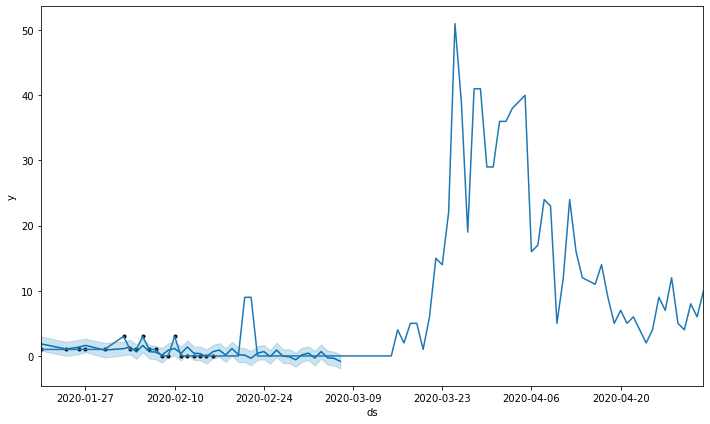

In [189]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6784773C8>],
      dtype=object)

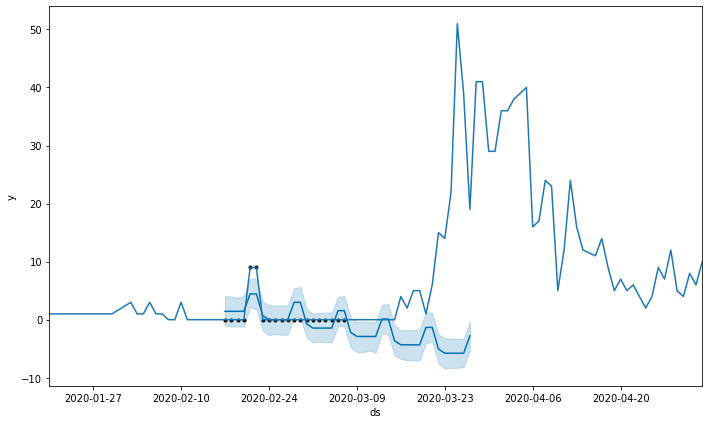

In [190]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C66A1FF688>],
      dtype=object)

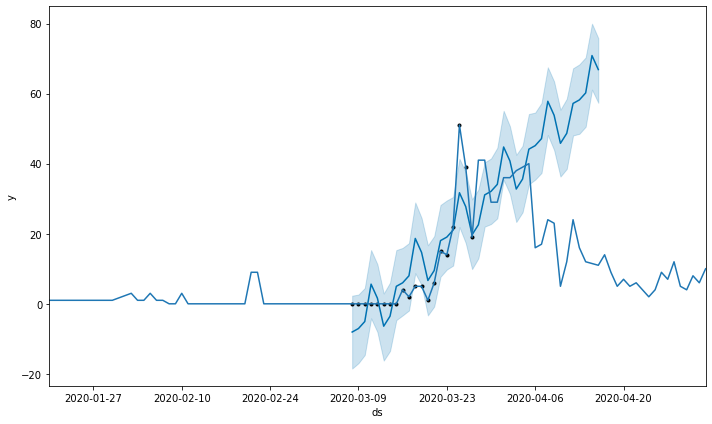

In [191]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67A9EF248>],
      dtype=object)

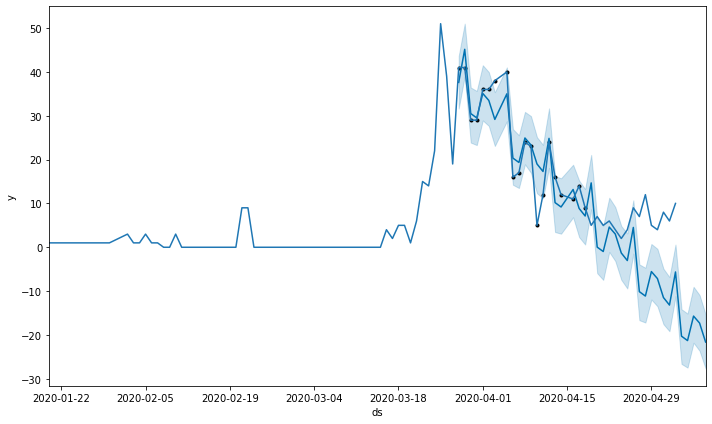

In [192]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67872FA08>],
      dtype=object)

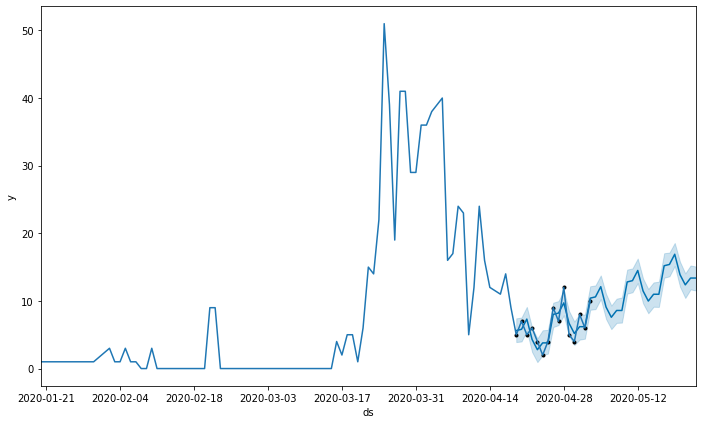

In [193]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=20)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

# 여전히 언더피팅이 보이므로 30개씩 슬라이싱

In [194]:
df_1=df[:30]
df_2=df[30:60]
df_3=df[60:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6790DB1C8>],
      dtype=object)

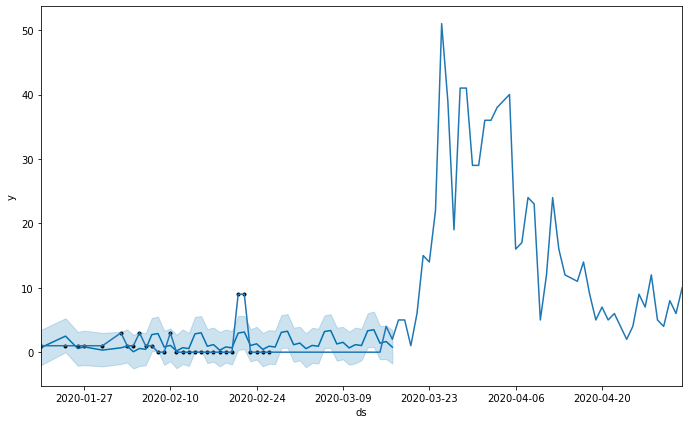

In [195]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C677066908>],
      dtype=object)

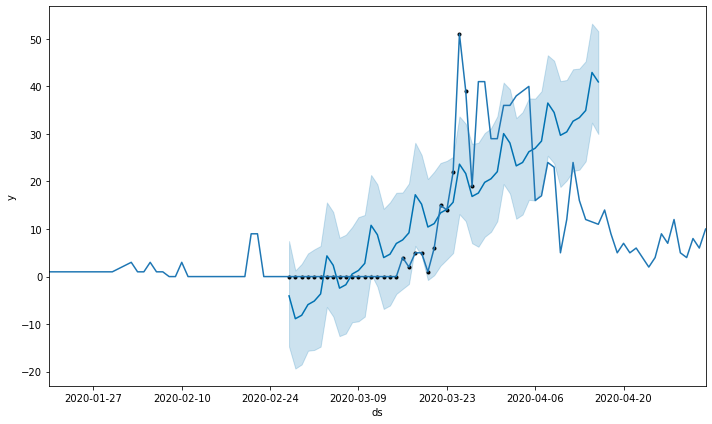

In [196]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C676FF8908>],
      dtype=object)

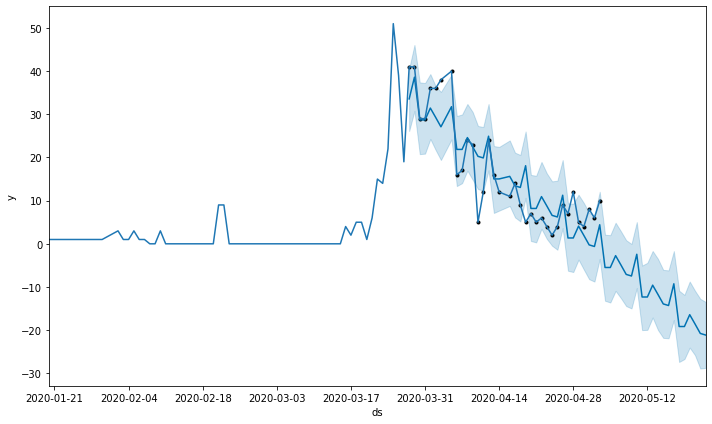

In [199]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

# 오버피팅이 보이므로 20~30 사이에 최적의 하이퍼파리미터가 있을거라 추측가능->애매

In [200]:
df_1=df[:25]
df_2=df[25:50]
df_3=df[50:75]
df_4=df[75:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C67A9F96C8>],
      dtype=object)

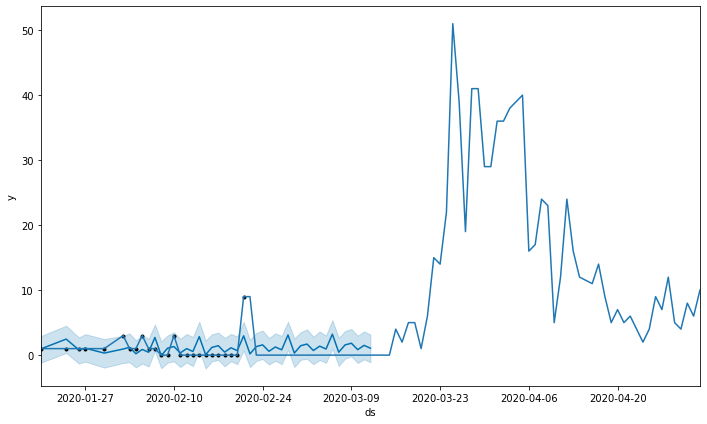

In [201]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6796FD148>],
      dtype=object)

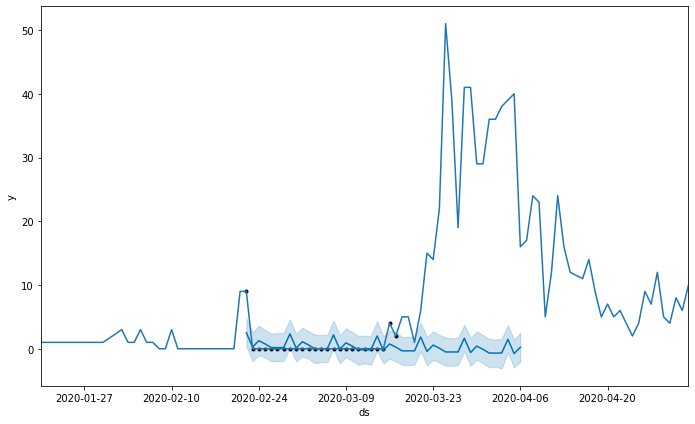

In [202]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C679EDCA88>],
      dtype=object)

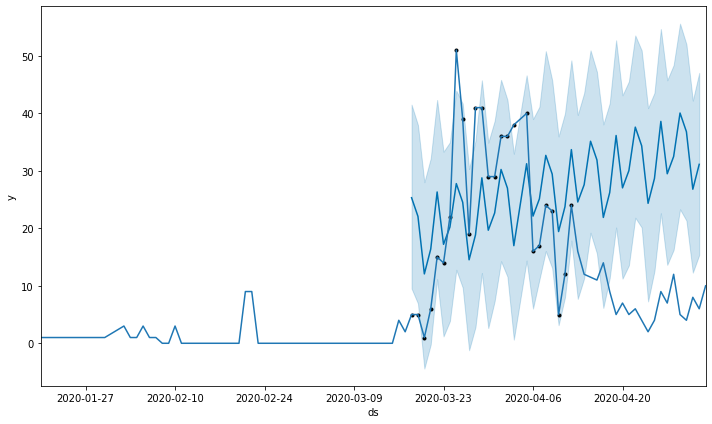

In [203]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6786907C8>],
      dtype=object)

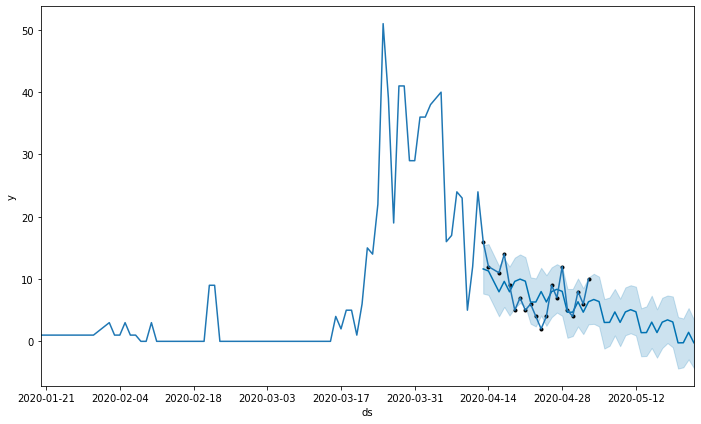

In [204]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

# 25개로 슬라이싱 한것이 적절히 피팅되었다고 판단

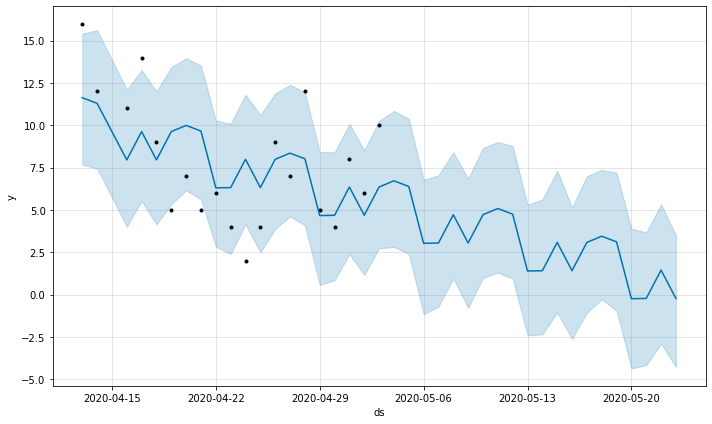

In [205]:
fig_4 = m_4.plot(forecast_4)

In [206]:
forecast_4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-13,10.132323,7.667087,15.412005,10.132323,10.132323,1.494281,1.494281,1.494281,1.494281,1.494281,1.494281,0.0,0.0,0.0,11.626604
1,2020-04-14,9.898568,7.445548,15.612224,9.898568,9.898568,1.394629,1.394629,1.394629,1.394629,1.394629,1.394629,0.0,0.0,0.0,11.293197
2,2020-04-16,9.431058,4.011917,12.108572,9.431058,9.431058,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,0.0,0.0,0.0,7.953622
3,2020-04-17,9.197303,5.523122,13.253158,9.197303,9.197303,0.427485,0.427485,0.427485,0.427485,0.427485,0.427485,0.0,0.0,0.0,9.624787
4,2020-04-18,8.963547,4.141332,12.001673,8.963547,8.963547,-1.008548,-1.008548,-1.008548,-1.008548,-1.008548,-1.008548,0.0,0.0,0.0,7.955000
5,2020-04-19,8.729792,5.331210,13.438086,8.729792,8.729792,0.896372,0.896372,0.896372,0.896372,0.896372,0.896372,0.0,0.0,0.0,9.626164
6,2020-04-20,8.496037,6.149156,13.955734,8.496037,8.496037,1.494281,1.494281,1.494281,1.494281,1.494281,1.494281,0.0,0.0,0.0,9.990318
7,2020-04-21,8.262282,5.621400,13.523986,8.262282,8.262282,1.394629,1.394629,1.394629,1.394629,1.394629,1.394629,0.0,0.0,0.0,9.656911
8,2020-04-22,8.028527,2.830031,10.272192,8.028527,8.028527,-1.726784,-1.726784,-1.726784,-1.726784,-1.726784,-1.726784,0.0,0.0,0.0,6.301742
9,2020-04-23,7.794772,2.390976,10.099000,7.794772,7.794772,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,0.0,0.0,0.0,6.317336


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

INFO:root:
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-207-98663658b181>", line 1, in <module>
    acuuracy()
NameError: name 'acuuracy' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Anaconda\lib\site-packages\IPython\core\ultratb.py", line 319, in wrapped
    return f(*args, **

NameError: name 'acuuracy' is not defined